In [1]:
print("hello world!")

hello world!


In [5]:
for i in range(3, 10, 2):
    print(i)

3
5
7
9


In [7]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [10]:
a = 0
for i in range(10):
    a = a + i

In [11]:
print(a)

45


In [16]:
x = 5
if (x >= 10) & (x <= 3):
    y = 3
elif (x < 6) | (x == 7):
    y = 2
else:
    y = 1
print(y)

2


In [1]:
import numpy as np

In [2]:
np.log(10)

2.302585092994046

In [5]:
A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(A)

[[1 2 3 4]
 [5 6 7 8]]


In [6]:
type(A)

numpy.ndarray

In [7]:
# inner product
np.dot(A, A.T)

array([[ 30,  70],
       [ 70, 174]])

In [11]:
# check
print(sum(A[0] * A[0]))
print(sum(A[0] * A[1]))
print(sum(A[1] * A[0]))
print(sum(A[1] * A[1]))

30
70
70
174


# Data Handling

In [12]:
import pandas as pd

In [17]:
# /Volumes/GoogleDrive/マイドライブ/200_Uni/205_M1/02_Macroeconomics/TA_1/JPNRGDPEXP.csv
df_gdp = pd.read_csv("/Volumes/GoogleDrive/マイドライブ/200_Uni/205_M1/02_Macroeconomics/TA_1/JPNRGDPEXP.csv", 
                    header = 0, index_col = 0)

In [18]:
df_gdp.head(10)

,JPNRGDPEXP
DATE,
1994-01-01,446278.0
1994-04-01,443805.1
1994-07-01,448938.0
1994-10-01,447131.3
1995-01-01,452082.7
1995-04-01,456345.6
1995-07-01,461704.5
1995-10-01,462813.7
1996-01-01,466647.4


In [20]:
df_gdp.shape

(108, 1)

In [22]:
df_gdp.index[0]

'1994-01-01'

In [23]:
index = pd.date_range(start=df_gdp.index[0], periods=df_gdp.shape[0], freq="Q")


In [24]:
df_gdp.set_index(keys=index, inplace=True)

In [25]:
df_gdp.head(10)

,JPNRGDPEXP
1994-03-31,446278.0
1994-06-30,443805.1
1994-09-30,448938.0
1994-12-31,447131.3
1995-03-31,452082.7
1995-06-30,456345.6
1995-09-30,461704.5
1995-12-31,462813.7
1996-03-31,466647.4
1996-06-30,472544.5


In [26]:
type(df_gdp.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [27]:
type(df_gdp)

pandas.core.frame.DataFrame

In [29]:
type(df_gdp["JPNRGDPEXP"])

pandas.core.series.Series

In [36]:
df_gdp.iloc[0:, :]

,JPNRGDPEXP
1994-03-31,446278.0
1994-06-30,443805.1
1994-09-30,448938.0
1994-12-31,447131.3
1995-03-31,452082.7
...,...
2019-12-31,548764.6
2020-03-31,545673.1
2020-06-30,500391.2
2020-09-30,526790.3


In [39]:
df_gdp.loc[["1994-03-31", "1994-06-30"], ["JPNRGDPEXP"]]


,JPNRGDPEXP
1994-03-31,446278.0
1994-06-30,443805.1


In [50]:
df_tmp = pd.DataFrame(data= {'col1':[1, 2, 3], 'col2':[4, 5, 6]})
df_tmp.head()

,col1,col2
0,1,4
1,2,5
2,3,6


In [58]:
df_tmp['col1']

0    1
1    2
2    3
Name: col1, dtype: int64

In [59]:
df_tmp2 = df_tmp
df_tmp2.set_index(keys=df_tmp2['col1'], inplace=True)
df_tmp2.head()

,col1,col2
col1,,
1,1,4
2,2,5
3,3,6


In [43]:
df_sub = df_tmp.iloc[-1:, :]
df_sub.head()

,col1,col2
2,3,6


# Plot a figure with matplotlib

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns

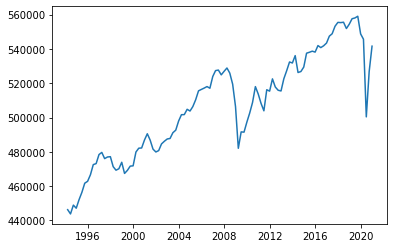

In [62]:
plt.plot(df_gdp.index, df_gdp.iloc[:, 0])

In [63]:
df_gdp.iloc[:, 0]

1994-03-31    446278.0
1994-06-30    443805.1
1994-09-30    448938.0
1994-12-31    447131.3
1995-03-31    452082.7
                ...   
2019-12-31    548764.6
2020-03-31    545673.1
2020-06-30    500391.2
2020-09-30    526790.3
2020-12-31    541619.3
Freq: Q-DEC, Name: JPNRGDPEXP, Length: 108, dtype: float64

In [64]:
df_gdp.index

DatetimeIndex(['1994-03-31', '1994-06-30', '1994-09-30', '1994-12-31',
               '1995-03-31', '1995-06-30', '1995-09-30', '1995-12-31',
               '1996-03-31', '1996-06-30',
               ...
               '2018-09-30', '2018-12-31', '2019-03-31', '2019-06-30',
               '2019-09-30', '2019-12-31', '2020-03-31', '2020-06-30',
               '2020-09-30', '2020-12-31'],
              dtype='datetime64[ns]', length=108, freq='Q-DEC')

# Time series analysis

## set up

- the library is called `statsmodels`

In [65]:
import statsmodels.api as sm

In [66]:
from statsmodels.tsa.api import VAR

In [67]:
df_var = pd.read_csv(filepath_or_buffer='/Volumes/GoogleDrive/マイドライブ/200_Uni/205_M1/02_Macroeconomics/TA_1/data_VAR1.csv')
df_var.head()

,Unnamed: 0,FFrate,Unemp,Infl
0,1960Q1,3.933,5.133,2.116
1,1960Q2,3.697,5.233,1.772
2,1960Q3,2.937,5.533,1.213
3,1960Q4,2.297,6.267,1.095
4,1961Q1,2.003,6.800,0.872


## Glimpse at data

In [68]:
# tail
df_var.tail()

,Unnamed: 0,FFrate,Unemp,Infl
235,2018Q4,2.220,3.800,2.192
236,2019Q1,2.403,3.867,2.091
237,2019Q2,2.397,3.633,2.074
238,2019Q3,2.190,3.633,2.308
239,2019Q4,1.643,3.533,2.293


In [69]:
# dimention
df_var.shape

(240, 4)

In [73]:
# infomation about dimension, dtype
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  240 non-null    object 
 1   FFrate      240 non-null    float64
 2   Unemp       240 non-null    float64
 3   Infl        240 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.6+ KB


In [72]:
# summary stats
df_var.describe()

,FFrate,Unemp,Infl
count,240.000000,240.000000,240.000000
mean,4.993983,5.965250,3.706538
std,3.647190,1.607159,2.561131
min,0.073000,3.400000,0.646000
25%,2.212500,4.858500,2.009750
50%,4.825000,5.683500,2.729500
75%,6.673000,7.033000,4.613000
max,17.780000,10.667000,13.277000


In [74]:
# type in terms of object in python
type(df_var.Infl)

pandas.core.series.Series

In [76]:
# type in terms of data
df_var.Infl.dtype

dtype('float64')

In [77]:
# glimse at the same time
df_var.dtypes

Unnamed: 0     object
FFrate        float64
Unemp         float64
Infl          float64
dtype: object

## Implementation

### estimation and reporting the result

In [78]:
# estimation
mdl_var = VAR(df_var[["FFrate", "Infl"]])

In [80]:
# results of var(2)
result1 = mdl_var.fit(2)
result1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, May, 2022
Time:                     13:50:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -1.99135
Nobs:                     238.000    HQIC:                  -2.07845
Log likelihood:          -411.082    FPE:                   0.117981
AIC:                     -2.13725    Det(Omega_mle):        0.113176
--------------------------------------------------------------------
Results for equation FFrate
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.106526         0.097621            1.091           0.275
L1.FFrate         1.273073         0.063691           19.988           0.000
L1.Infl          -0.349244         0.111896           -3.121           0.00

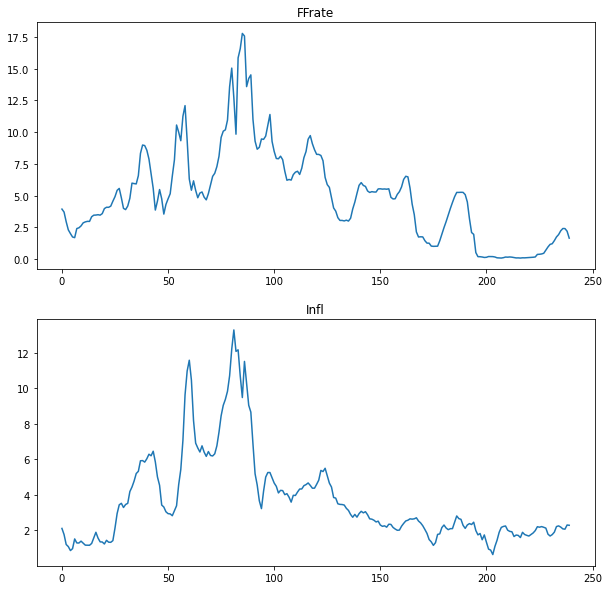

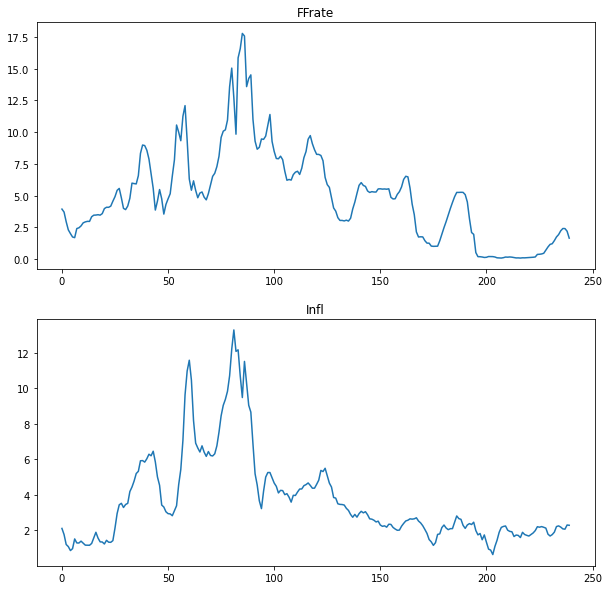

In [87]:
# plot the result
result1.plot()

### Lag selection

In [88]:
# lag selection in view of AIC, BIC or something
lag_selection = mdl_var.select_order(15)
lag_selection.summary()

,AIC,BIC,FPE,HQIC
0,3.543,3.573,34.56,3.555
1,-1.573,-1.482,0.2075,-1.536
2,-2.060,-1.908,0.1274,-1.999
3,-2.158,-1.946,0.1155,-2.073
4,-2.368,-2.094,0.09371,-2.257
5,-2.541,-2.206*,0.07884,-2.406
6,-2.541,-2.146,0.07882,-2.382
7,-2.570,-2.115,0.07656,-2.386
8,-2.579,-2.062,0.07592,-2.370
9,-2.655,-2.078,0.07035,-2.422*


In [86]:
# estimation based on lag selection
result2 = mdl_var.fit(maxlags=15, ic='bic')
result2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, May, 2022
Time:                     14:04:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.25880
Nobs:                     235.000    HQIC:                  -2.45210
Log likelihood:          -341.437    FPE:                  0.0755822
AIC:                     -2.58267    Det(Omega_mle):       0.0689739
--------------------------------------------------------------------
Results for equation FFrate
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.164924         0.092900            1.775           0.076
L1.FFrate         1.445780         0.067838           21.312           0.000
L1.Infl          -0.828914         0.136126           -6.089           0.00

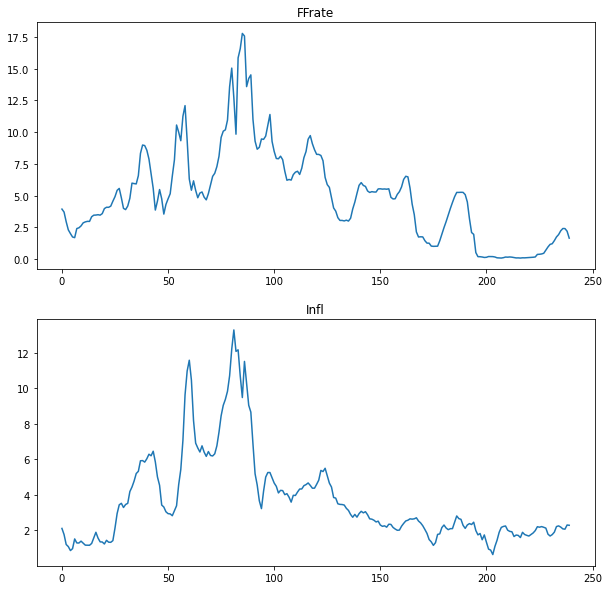

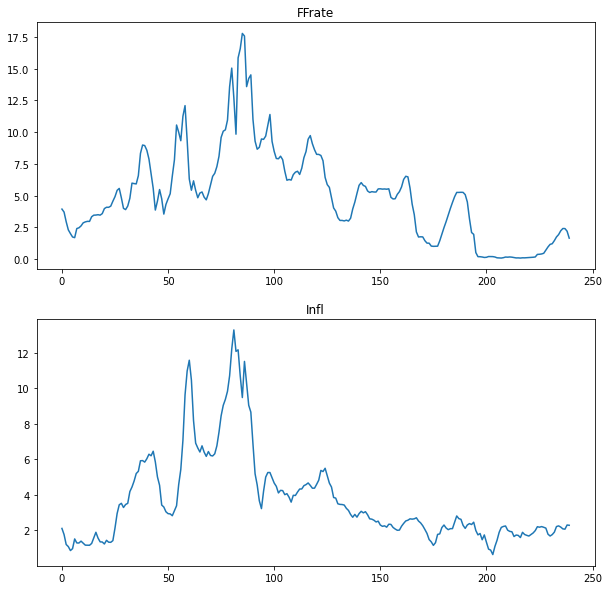

In [89]:
# plot the result
result2.plot()

### Granger causality

In [92]:
# granger test
gtest = result2.test_causality('FFrate','Infl', kind='f',signif=0.05)
gtest.summary()

Test statistic,Critical value,p-value,df
10.91,2.234,0.000,"(5, 448)"


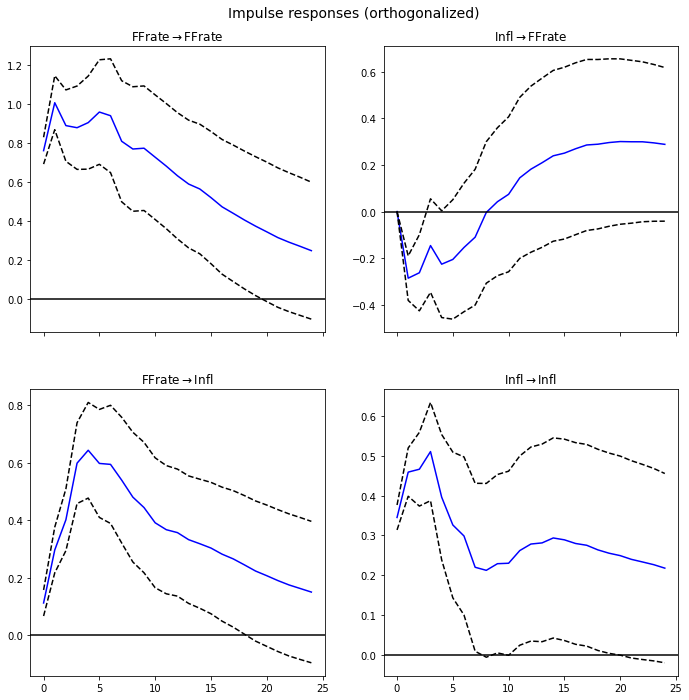

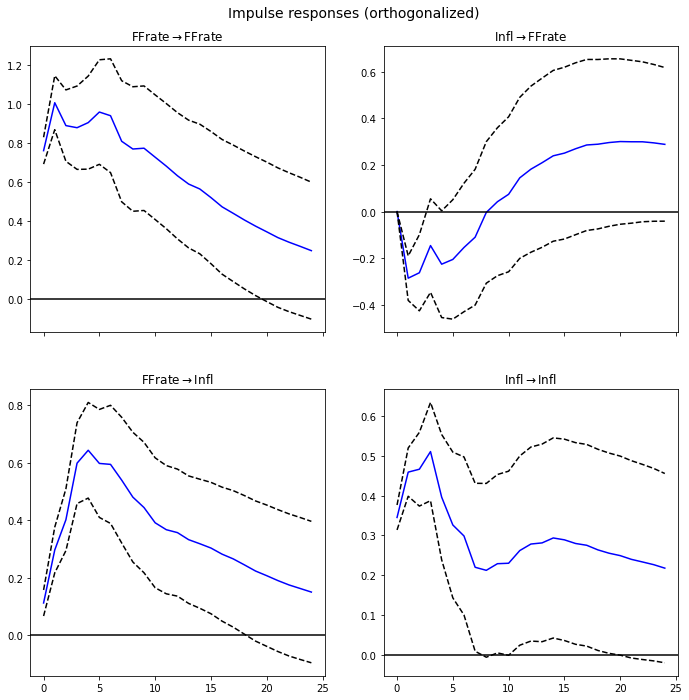

In [94]:
irf_result = result2.irf(periods=24)
irf_result.plot(orth=True, signif=0.05)